In [1]:
import geopandas
import pandas as pd

# http://geopandas.org/mapping.html

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [4]:
world.plot();
# for some reason the semicolon plots it

In [5]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
# I think it might just be better to do it their way, some issue with copy
# not including Antarctica
# I'm going to change this from creating another variable world to decrease confusion
# new_world = world[(world.pop_est>0) & (world.name!="Antarctica")]
# I think we need world[(world.pop... etc)] because we are performing an operation on it

In [6]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [7]:
print(world.gdp_md_est.head())

0     22270.0
1    110300.0
2     21810.0
3    184300.0
4    573900.0
Name: gdp_md_est, dtype: float64


In [8]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est


In [9]:
world.sort_values(by='continent', ascending=True).head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
176,12619600.0,Africa,Zimbabwe,ZWE,9323.0,"POLYGON ((31.19140913262129 -22.2515096981724,...",0.000739
31,20617068.0,Africa,Côte d'Ivoire,CIV,33850.0,POLYGON ((-2.856125047202397 4.994475816259509...,0.001642
32,18879301.0,Africa,Cameroon,CMR,42750.0,"POLYGON ((13.07582238124675 2.267097072759015,...",0.002264


In [10]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [11]:
world.sort_values(by='continent', ascending=True).head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
176,12619600.0,Africa,Zimbabwe,ZWE,9323.0,"POLYGON ((31.19140913262129 -22.2515096981724,...",0.000739
31,20617068.0,Africa,Côte d'Ivoire,CIV,33850.0,POLYGON ((-2.856125047202397 4.994475816259509...,0.001642
32,18879301.0,Africa,Cameroon,CMR,42750.0,"POLYGON ((13.07582238124675 2.267097072759015,...",0.002264


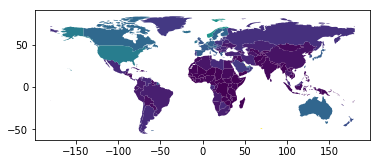

In [12]:
world.plot(column='gdp_per_cap')

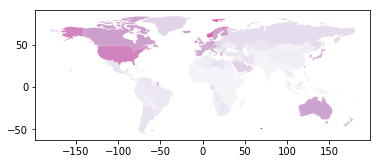

In [15]:
world.plot(column='gdp_per_cap', cmap='PuRd');
# full list of colormaps: https://matplotlib.org/users/colormaps.html
# this one is part of the sequential colormaps

SyntaxError: invalid syntax (FileIO.py, line 37)

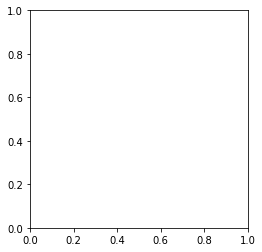

In [16]:
world.plot(column='gdp_per_cap', cmap='Purples', scheme='quantiles');


Maps with Layers

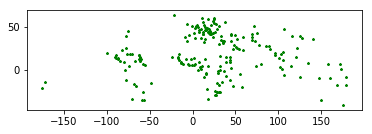

In [17]:
cities.plot(marker='*', color='green', markersize=5);

Look at CRS

In [18]:
cities = cities.to_crs(world.crs)

Combine Maps

Method 1

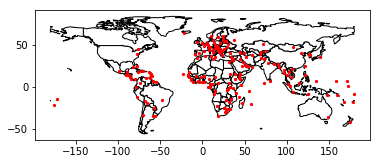

In [19]:
base = world.plot(color='white', edgecolor='black')
cities.plot(ax=base, marker='o', color='red', markersize=5);

Method 2: Using matplotlib objects

In [20]:
import matplotlib.pyplot as plt

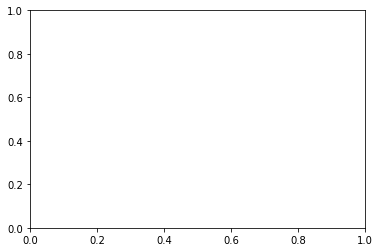

In [21]:
fig, ax = plt.subplots()


In [22]:
# set aspect o equal. This is done automatically when using geopandas plot on it's own but not with pyplot directly
ax.set_aspect('equal')



In [23]:
world.plot(ax=ax, color='white', edgecolor='black')



<Figure size 432x288 with 0 Axes>

In [24]:
cities.plot(ax=ax, marker='o', color='red', markersize=5);


<Figure size 432x288 with 0 Axes>

In [25]:
plt.show();
# this doesn't do anything I don't know why

Set-Operations with Overlay
 http://geopandas.org/set_operations.html

In [26]:
from shapely.geometry import Polygon

In [27]:
polys1 = geopandas.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]),
                              Polygon([(2,2), (4,2), (4,4), (2,4)])])

In [28]:
polys2 = geopandas.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                              Polygon([(3,3), (5,3), (5,5), (3,5)])])

In [29]:
df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
print(df1)
# note keys
# Not entirely sure why 'df1' is then listed as a key

   df1                             geometry
0    1  POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))
1    2  POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))


In [30]:
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

These GeoDataFrames have some overlapping areas:

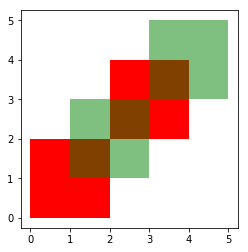

In [31]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);
# we seem to be setting the axes as df1
# this worked when I put it in the same block of code but not when I separated it.



Above is a different overlay method than below. The `overlay` function will determine the set of all individual geometries from overlaying the two input GeoDataFrames. The result will cover the area covered by the two input GDF and also preserve all unique regions defined by the combined boundaries of the two GDFs.

When using `how='union'` all those possible geometries are returned:

In [35]:
res_union = geopandas.overlay(df1, df2, how='union')

AttributeError: 'NoneType' object has no attribute 'intersection'

In [11]:
res_union

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((1 2, 2 2, 2 1, 1 1, 1 2))"
1,2.0,1.0,"POLYGON ((2 2, 2 3, 3 3, 3 2, 2 2))"
2,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"
3,1.0,NaN,"POLYGON ((0 0, 0 2, 1 2, 1 1, 2 1, 2 0, 0 0))"
4,2.0,NaN,"(POLYGON ((2 3, 2 4, 3 4, 3 3, 2 3)), POLYGON ..."
5,NaN,1.0,"(POLYGON ((1 2, 1 3, 2 3, 2 2, 1 2)), POLYGON ..."
6,NaN,2.0,"POLYGON ((3 4, 3 5, 5 5, 5 3, 4 3, 4 4, 3 4))"


In [34]:
ax = res_union.plot(alpha=0.5, cmap='tab10')
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

NameError: name 'res_union' is not defined

In [14]:
res_intersection = geopandas.overlay(df1, df2, how='intersection')